In [0]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.compat import lzip
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [0]:
df = pd.read_csv('Gender_StatsData.csv')


In [6]:
df['full_count'] = df.apply(lambda x: x.count(), axis=1)
df = df.drop(['Country Code','Indicator Code','Unnamed: 63'],axis=1)

df.shape

(140179, 62)

In [0]:
df.head()

In [0]:
def valuecounts(a,b,c):
  counts = a[b].value_counts()
  counts = counts[counts>c]
  a1 = a[a[b].isin(counts.index)]
  return a1



In [0]:
a1 = valuecounts(df,'Country Name',50)
#a1['Country Name'].value_counts()

In [9]:
df = df[df['full_count']>=30]
df.shape

(24174, 62)

In [0]:
df['Indicator Name'].value_counts()

In [10]:
df = valuecounts(df,'Indicator Name',179)
df.shape

(19581, 62)

In [0]:
df['Indicator Name'].nunique()

87

In [0]:
df['Country Name'].value_counts()

In [11]:
df = valuecounts(df,'Country Name',59)
df.shape

(19133, 62)

In [12]:
counts3 = df['Country Name'].value_counts()
counts3 = counts3[counts3<76]
counts3 = counts3[counts3>70]
df = df[df['Country Name'].isin(counts3.index)]
df.shape


(3500, 62)

In [13]:
to_drop = ['Eritrea',                                              
'Timor-Leste' ,                                         
'Liberia'    ,                                          
'Montenegro' ,
'IDA blend',
'IBRD only',
'Caribbean small states'   ,                            
'Post-demographic dividend' ,                           
'New Caledonia'        ,                                
'Europe & Central Asia (excluding high income)',
'Pacific island small states'   ,                       
'French Polynesia'    ,                                 
'Middle East & North Africa',
'Serbia','Latin America & Caribbean (IDA & IBRD)',
'Pre-demographic dividend','IDA only','Early-demographic dividend',
'East Asia & Pacific (excluding high income)','Upper middle income','Low & middle income']

df = df[~df['Country Name'].isin(to_drop)]


df.shape


(1970, 62)

In [14]:
df.rename(columns = {'Country Name':'Region'},inplace=True)

df.Region.value_counts()


World                                                75
IDA total                                            73
North America                                        73
European Union                                       73
Sub-Saharan Africa                                   73
Latin America & Caribbean                            73
Least developed countries: UN classification         73
Lower middle income                                  73
East Asia & Pacific                                  73
Europe & Central Asia                                73
IDA & IBRD total                                     73
Sub-Saharan Africa (excluding high income)           73
Late-demographic dividend                            73
Latin America & Caribbean (excluding high income)    73
OECD members                                         73
Low income                                           73
Sub-Saharan Africa (IDA & IBRD)                      73
Euro area                                       

In [0]:
df['Indicator Name'].value_counts()

In [15]:
df = valuecounts(df,'Indicator Name',26)
df.shape


(1890, 62)

In [0]:
to_drop2 = ['Contributing family workers, male (% of male employment) (modeled ILO estimate)',
'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
'Employers, male (% of male employment) (modeled ILO estimate)' ,
'Age dependency ratio (% of working-age population)',
'Vulnerable employment, male (% of male employment) (modeled ILO estimate)',
'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)',
'Population ages 15-64, total',
'Employment in industry, male (% of male employment) (modeled ILO estimate)',
'Wage and salaried workers, male (% of male employment) (modeled ILO estimate)',
'Life expectancy at birth, male (years)',
'Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)',
'Employment in agriculture, male (% of male employment) (modeled ILO estimate)',
'Self-employed, male (% of male employment) (modeled ILO estimate)']

df = df[~df['Indicator Name'].isin(to_drop2)]
df['Indicator Name'].value_counts()

In [17]:
to_keep = [
    'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
    'Prevalence of overweight, female (% of female adults)',
    'Primary education, pupils (% female)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'School enrollment, primary, female (% gross)',
    'Fertility rate, total (births per woman)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Employers, female (% of female employment) (modeled ILO estimate)',
    'Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)',
    'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
    'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
    'Fertility rate, total (births per woman)',
    'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
    'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
    'Self-employed, female (% of female employment) (modeled ILO estimate)',
    'Own-account workers, female (% of female employment) (modeled ILO estimate)',
    'Number of maternal deaths',
    'Population, female (% of total)',
    'Population ages 15-64, female'   ,                                                            
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)'   ,                 
    'Life expectancy at birth, female (years)'   ,                                                         
    'Labor force, female (% of total labor force)'   ,                                                     
    'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)'   ,
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
    'Immunization, measles (% of children ages 12-23 months)',
    'GNI per capita, PPP (current international $)',
    'Death rate, crude (per 1,000 people)'
    
]

df = df[df['Indicator Name'].isin(to_keep)]
df['Indicator Name'].nunique()

24

In [0]:
df['Indicator Name'].value_counts()

In [0]:
df.shape

(648, 62)

In [18]:
df1 = df.drop(df.iloc[:,2:32],axis=1)
df1.head()


,Region,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,full_count
6,Arab World,"Adolescent fertility rate (births per 1,000 wo...",69.287035,68.020174,67.108673,65.053264,62.979722,60.718474,58.587535,56.425224,55.581968,54.784055,54.032326,53.187505,52.372919,51.929831,51.529752,51.165978,50.766666,50.413037,50.159997,49.924648,49.705138,49.522584,49.340230,48.925896,48.474282,47.946223,47.266617,46.543283,NaN,62
48,Arab World,"Death rate, crude (per 1,000 people)",7.970246,7.780692,7.644617,7.465960,7.291314,7.092940,6.935355,6.791591,6.666936,6.559099,6.467707,6.388491,6.316960,6.247486,6.176478,6.103109,6.029161,5.957044,5.894389,5.841634,5.797548,5.758391,5.719486,5.678328,5.634164,5.588410,5.542442,5.499142,NaN,62
82,Arab World,"Employers, female (% of female employment) (mo...",NaN,1.895174,1.988144,1.950090,2.029737,2.269749,2.166611,1.990249,2.273894,2.360037,1.983438,2.526244,2.273367,1.958235,2.013741,1.872992,1.651973,1.850323,2.026252,1.917185,1.759822,1.715847,1.671481,1.558009,1.574689,1.477478,1.566784,1.541135,1.561642,32
90,Arab World,"Employment to population ratio, 15+, female (%...",NaN,16.198282,16.288906,16.111547,16.243907,16.174802,16.326882,16.092926,15.926986,16.310199,16.096428,16.068465,15.599957,15.840918,15.976079,16.054489,16.339762,16.993805,16.726979,16.556835,16.616396,16.601332,16.658526,16.924549,16.870909,16.654917,16.752851,16.726855,16.734726,32
116,Arab World,"Fertility rate, total (births per woman)",5.202061,5.040840,4.896682,4.731346,4.569543,4.404102,4.261059,4.129017,4.009007,3.902371,3.809781,3.730241,3.662147,3.604335,3.555602,3.516902,3.488844,3.471495,3.463819,3.462588,3.464072,3.462471,3.454316,3.436522,3.407631,3.368495,3.321159,3.270962,NaN,62


In [0]:
df1.isnull().sum()

In [19]:
df1['1990'].fillna(df1['1991'], inplace=True)
df1['2016'].fillna(df1['2015'], inplace=True)
df1['2017'].fillna(df1['2016'], inplace=True)
df1['2018'].fillna(df1['2017'], inplace=True)
df1.isnull().sum()

Region            0
Indicator Name    0
1990              3
1991              3
1992              0
1993              0
1994              0
1995              0
1996              0
1997              0
1998              0
1999              0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
2017              0
2018              0
full_count        0
dtype: int64

In [0]:
df1['Region'].value_counts()

In [0]:
df1 = df1.drop('full_count',axis=1)

In [0]:
def setting_frame(a):
  a = a.set_index('Indicator Name').drop('Region',axis=1).T
  a = a.reset_index()
  a.rename(columns={'index':'Year'},inplace=True)
  return a

In [18]:
Black_Africa = df1[df1['Region']=='Sub-Saharan Africa']

Black_Africa = setting_frame(Black_Africa)
Black_Africa.head()

Indicator Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Death rate, crude (per 1,000 people)","Employers, female (% of female employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Fertility rate, total (births per woman)","GNI per capita, PPP (current international $)","Immunization, measles (% of children ages 12-23 months)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force, female (% of total labor force)","Life expectancy at birth, female (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Number of maternal deaths,"Own-account workers, female (% of female employment) (modeled ILO estimate)","Population ages 15-64, female","Population, female (% of total)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of overweight, female (% of female adults)","Primary education, pupils (% female)",Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"School enrollment, primary, female (% gross)","Self-employed, female (% of female employment) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)"
0,1990,139.561692,16.223780,1.319809,56.434316,6.331480,1598.834960,57.269665,62.021711,44.862968,51.698884,987.0,223000.0,47.248298,132841781.0,50.277433,51.116239,20.963487,45.000408,80.240818,97.025032,65.468407,87.334090,14.283821,86.014352
1,1991,138.295206,16.176395,1.319809,56.434316,6.265308,1632.333393,53.934845,62.052352,44.899770,51.703727,975.0,225000.0,47.248298,136687018.0,50.282847,50.485356,21.535577,45.220230,80.290443,97.025032,66.825951,87.334090,14.283821,86.014352
2,1992,137.031682,16.106228,1.337972,56.474240,6.200204,1584.589057,50.698312,62.106530,44.957133,51.700630,965.0,227000.0,47.483272,140781342.0,50.288612,49.892740,22.107213,45.374561,80.400608,96.804235,66.840630,87.182210,14.244405,85.844393
3,1993,136.118332,16.013988,1.354474,56.366462,6.137979,1581.640463,51.439515,62.201573,45.053052,51.695723,956.0,230000.0,47.557100,145095989.0,50.293517,49.317224,22.682858,45.355438,80.633516,97.276408,67.639717,87.147756,14.704355,85.793421
4,1994,135.180268,15.905379,1.373302,56.414102,6.079286,1594.933237,55.035058,62.319895,45.164877,51.688429,944.0,232000.0,47.625240,149597705.0,50.296135,48.787898,23.255377,45.403580,80.934653,97.112378,67.933571,87.029400,14.832840,85.656013


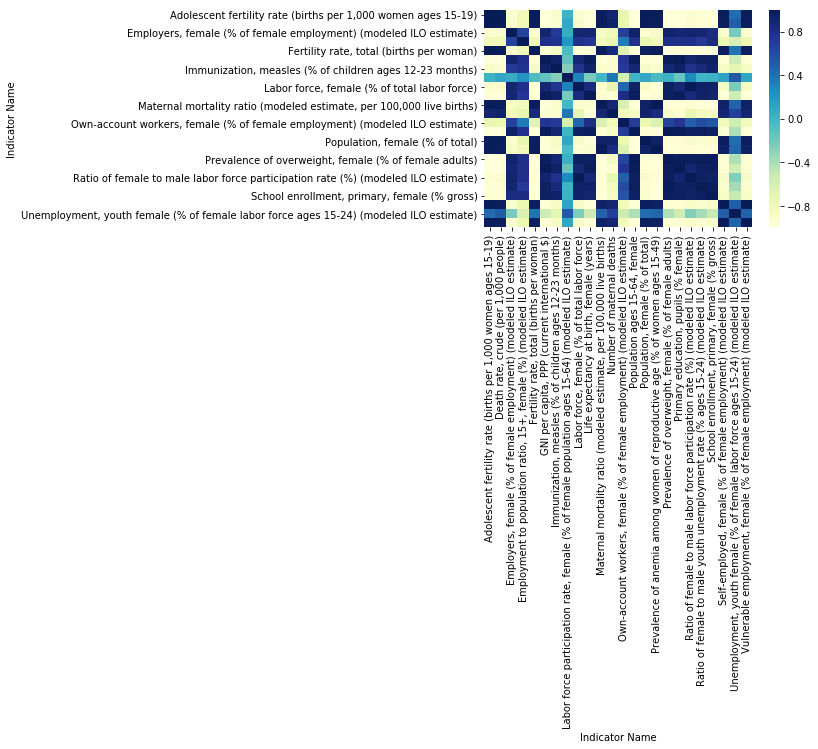

In [19]:
import seaborn as sns
sns.heatmap((Black_Africa.corr()), cmap='YlGnBu')

In [20]:
Black_Africa.corr()

Indicator Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Death rate, crude (per 1,000 people)","Employers, female (% of female employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Fertility rate, total (births per woman)","GNI per capita, PPP (current international $)","Immunization, measles (% of children ages 12-23 months)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force, female (% of total labor force)","Life expectancy at birth, female (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Number of maternal deaths,"Own-account workers, female (% of female employment) (modeled ILO estimate)","Population ages 15-64, female","Population, female (% of total)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of overweight, female (% of female adults)","Primary education, pupils (% female)",Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"School enrollment, primary, female (% gross)","Self-employed, female (% of female employment) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)"
Indicator Name,,,,,,,,,,,,,,,,,,,,,,,,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.000000,0.994350,-0.935504,-0.782391,0.996429,-0.990681,-0.893536,0.021941,-0.935174,-0.976033,0.984132,0.893681,-0.705642,-0.998870,0.981314,0.978017,-0.995337,-0.983630,-0.951281,-0.969585,-0.955708,0.976670,0.435631,0.978828
"Death rate, crude (per 1,000 people)",0.994350,1.000000,-0.906949,-0.784753,0.984227,-0.997879,-0.930380,0.107132,-0.902599,-0.988082,0.984657,0.930347,-0.736304,-0.990004,0.979412,0.974378,-0.987194,-0.995022,-0.922119,-0.963138,-0.961286,0.976144,0.513237,0.975961
"Employers, female (% of female employment) (modeled ILO estimate)",-0.935504,-0.906949,1.000000,0.654337,-0.936111,0.910581,0.716020,0.068922,0.895074,0.902695,-0.879984,-0.781755,0.678829,0.942784,-0.941557,-0.877597,0.921571,0.883785,0.908585,0.902513,0.825327,-0.925383,-0.222257,-0.936904
"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",-0.782391,-0.784753,0.654337,1.000000,-0.789736,0.790363,0.767152,0.217316,0.795221,0.735608,-0.819607,-0.715847,0.365635,0.782371,-0.731435,-0.798460,0.795369,0.790946,0.804634,0.723071,0.828028,-0.744756,-0.623262,-0.741483
"Fertility rate, total (births per woman)",0.996429,0.984227,-0.936111,-0.789736,1.000000,-0.977877,-0.873068,-0.052391,-0.960835,-0.954874,0.985586,0.855776,-0.660050,-0.996464,0.965971,0.984775,-0.998359,-0.970216,-0.972141,-0.973764,-0.958577,0.965010,0.392540,0.968124
"GNI per capita, PPP (current international $)",-0.990681,-0.997879,0.910581,0.790363,-0.977877,1.000000,0.928985,-0.124538,0.889635,0.991734,-0.976721,-0.940938,0.748041,0.986861,-0.982301,-0.963209,0.980062,0.993847,0.910970,0.952714,0.950057,-0.979051,-0.531540,-0.978945
"Immunization, measles (% of children ages 12-23 months)",-0.893536,-0.930380,0.716020,0.767152,-0.873068,0.928985,1.000000,-0.271179,0.763464,0.922744,-0.916620,-0.930711,0.711416,0.881598,-0.867657,-0.898594,0.888648,0.939543,0.785582,0.859252,0.916031,-0.876912,-0.688135,-0.868514
"Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)",0.021941,0.107132,0.068922,0.217316,-0.052391,-0.124538,-0.271179,1.000000,0.310718,-0.223218,-0.010656,0.389090,-0.591280,0.002967,0.102642,-0.035773,0.035875,-0.151412,0.275222,0.015633,0.021659,0.127075,0.529220,0.111454
"Labor force, female (% of total labor force)",-0.935174,-0.902599,0.895074,0.795221,-0.960835,0.889635,0.763464,0.310718,1.000000,0.838324,-0.941483,-0.694533,0.463958,0.939954,-0.87

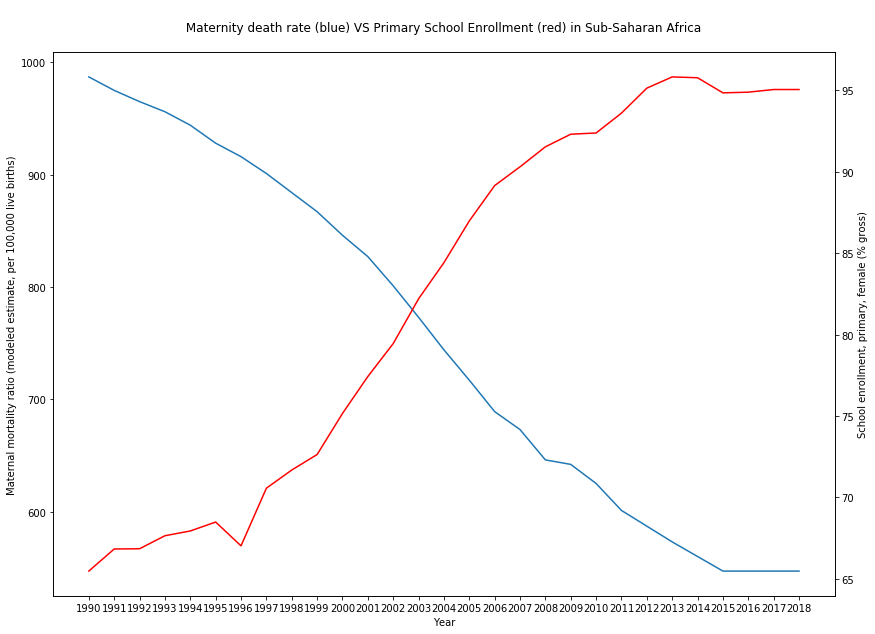

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()
sns.lineplot(x='Year',y='School enrollment, primary, female (% gross)',data=Black_Africa, ax = ax2, color = 'red')

sns.lineplot(x='Year',y='Maternal mortality ratio (modeled estimate, per 100,000 live births)',data=Black_Africa, ax = ax)
plt.title('\n Maternity death rate (blue) VS Primary School Enrollment (red) in Sub-Saharan Africa \n')

plt.show()

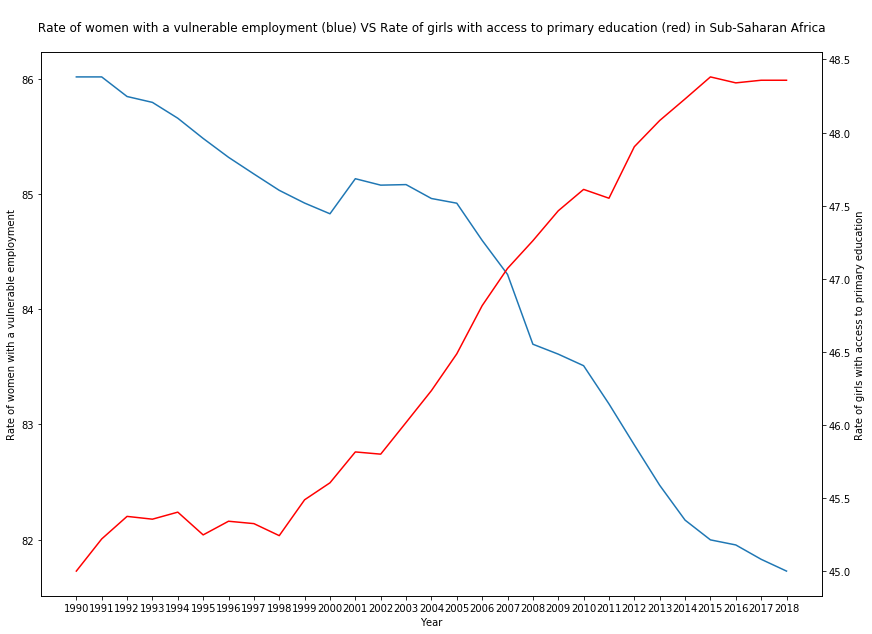

In [22]:
#Adolescent fertility rate (births per 1,000 women ages 15-19)
#Primary education, pupils (% female)

Black_Africa.rename(columns={'Vulnerable employment, female (% of female employment) (modeled ILO estimate)':
                     'Rate of women with a vulnerable employment','Primary education, pupils (% female)':
                            'Rate of girls with access to primary education'}, inplace=True)

fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()
sns.lineplot(x='Year',y='Rate of girls with access to primary education',data=Black_Africa, ax = ax2, color = 'red')

sns.lineplot(x='Year',y='Rate of women with a vulnerable employment',data=Black_Africa, ax = ax)
plt.title('\n Rate of women with a vulnerable employment (blue) VS Rate of girls with access to primary education (red) in Sub-Saharan Africa \n')

plt.show()

In [0]:
OECD = df1[df1['Region']=='OECD members']
OECD = setting_frame(OECD)
OECD.rename(columns={'Employers, female (% of female employment) (modeled ILO estimate)':
                     'Rate of female employers in %'}, inplace=True)




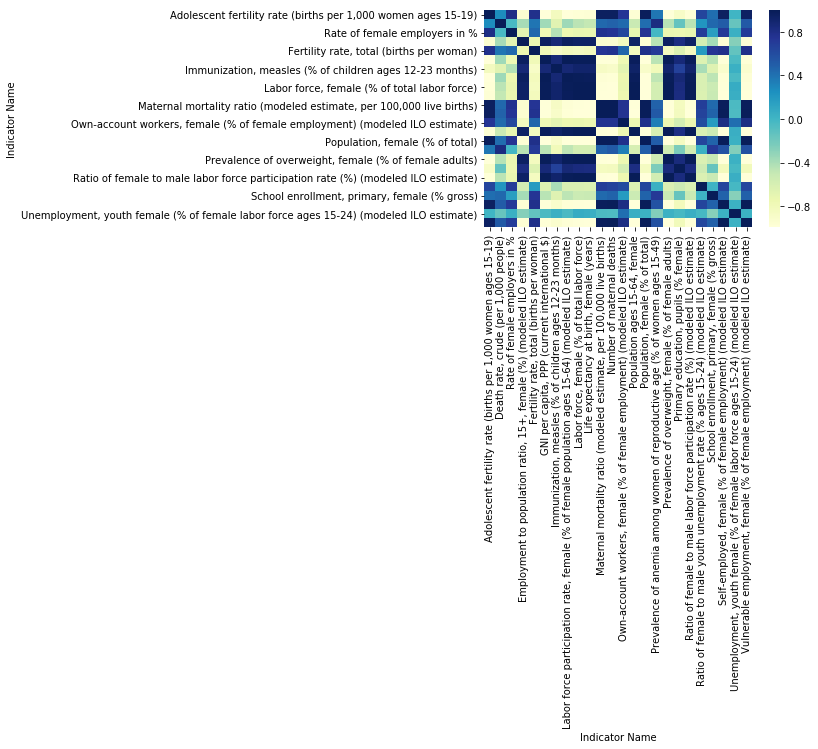

In [24]:
sns.heatmap((OECD.set_index('Year')).corr(), cmap='YlGnBu')

In [25]:
OECD.set_index('Year').corr()

Indicator Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Death rate, crude (per 1,000 people)",Rate of female employers in %,"Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Fertility rate, total (births per woman)","GNI per capita, PPP (current international $)","Immunization, measles (% of children ages 12-23 months)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force, female (% of total labor force)","Life expectancy at birth, female (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Number of maternal deaths,"Own-account workers, female (% of female employment) (modeled ILO estimate)","Population ages 15-64, female","Population, female (% of total)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of overweight, female (% of female adults)","Primary education, pupils (% female)",Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"School enrollment, primary, female (% gross)","Self-employed, female (% of female employment) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)"
Indicator Name,,,,,,,,,,,,,,,,,,,,,,,,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.000000,0.269664,0.810817,-0.936634,0.782833,-0.989767,-0.826653,-0.988870,-0.973588,-0.969678,0.966969,0.965192,0.738640,-0.959045,0.979244,0.377973,-0.980733,-0.880437,-0.974913,0.644727,0.421904,0.955202,0.007459,0.950134
"Death rate, crude (per 1,000 people)",0.269664,1.000000,-0.024791,-0.383976,0.384829,-0.361518,-0.660387,-0.349247,-0.453625,-0.485712,0.449029,0.478432,0.441555,-0.511619,0.430405,0.830456,-0.434035,-0.137719,-0.455112,0.222258,0.447698,0.512129,-0.147875,0.526820
Rate of female employers in %,0.810817,-0.024791,1.000000,-0.680132,0.451391,-0.768469,-0.430505,-0.744867,-0.710830,-0.717763,0.767718,0.743533,0.640036,-0.698632,0.750667,-0.005851,-0.737475,-0.747251,-0.718283,0.698294,0.166125,0.718043,0.043143,0.699456
"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",-0.936634,-0.383976,-0.680132,1.000000,-0.743809,0.962966,0.867716,0.963424,0.939381,0.941008,-0.931480,-0.934088,-0.827968,0.939401,-0.962305,-0.445006,0.946090,0.825113,0.942924,-0.570516,-0.374654,-0.956962,-0.265524,-0.956894
"Fertility rate, total (births per woman)",0.782833,0.384829,0.451391,-0.743809,1.000000,-0.788697,-0.878970,-0.816302,-0.839627,-0.816990,0.743762,0.771943,0.465817,-0.825705,0.795979,0.713118,-0.826298,-0.638295,-0.832254,0.189242,0.750595,0.787084,-0.136080,0.791097
"GNI per capita, PPP (current international $)",-0.989767,-0.361518,-0.768469,0.962966,-0.788697,1.000000,0.868469,0.994983,0.986091,0.986582,-0.983028,-0.984362,-0.763951,0.980517,-0.994713,-0.451527,0.992123,0.861209,0.988344,-0.638808,-0.445037,-0.980333,-0.043848,-0.977546
"Immunization, measles (% of children ages 12-23 months)",-0.826653,-0.660387,-0.430505,0.867716,-0.878970,0.868469,1.000000,0.879825,0.919933,0.917955,-0.867750,-0.892521,-0.677332,0.929896,-0.891207,-0.794613,0.907249,0.670644,0.916591,-0.394200,-0.647944,-0.913783,0.045878,-0.921999
"Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)",-0.988870,-0.349247,-0.744867,0.963424,-0.816302,0.994983,0.879825,1.000000,0.989042,0.984206,-0.971230,-0.974122,-0.736589,0.978412,-0.988997,-0.467868,0.991047,0.869957,0.989505,-0.608935,-0.462051,-0.972624,-0.029354,-0.970521
"Labor force, female (% of total labor force)",-0.973588,-0.453625,-0.710830,0.939381,-0.839627,0.986091,0.919933,0.989042,1.000000,0.997153,-0.981263,-0.988076,-0.728413,0.995970,-0.990060,-0.566889,0.997792,0.839337,0.999700,-0.607140,-0.524961,-0

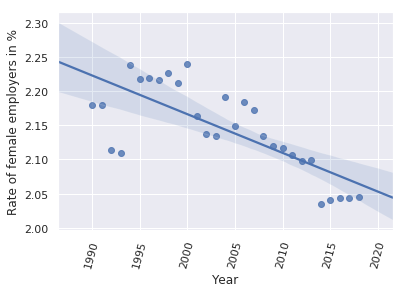

In [26]:
sns.set()
OECD.Year = pd.to_numeric(OECD.Year)
sns.regplot(x='Year',y='Rate of female employers in %', data=OECD, fit_reg=True)
plt.xticks(rotation = 75)

plt.show()

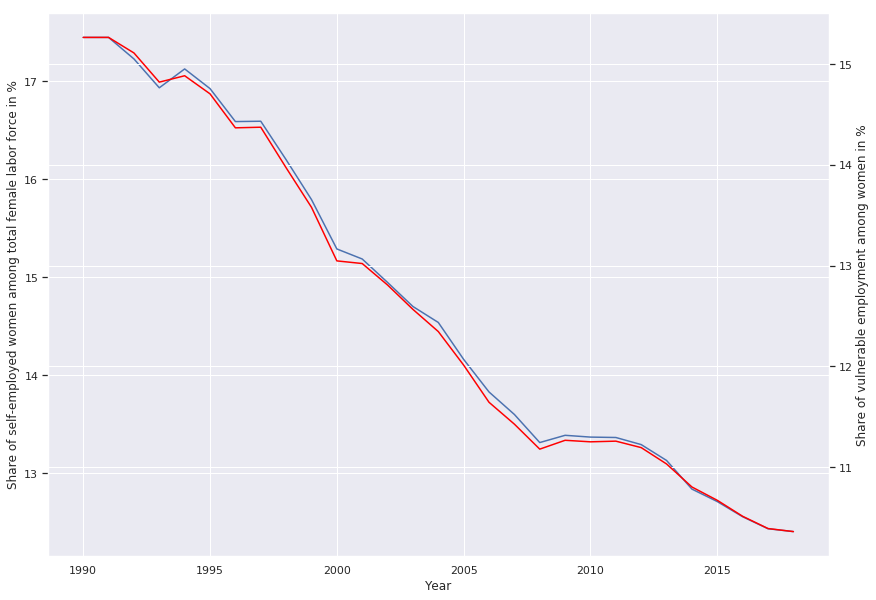

In [27]:
OECD.rename(columns = {'Vulnerable employment, female (% of female employment) (modeled ILO estimate)':'Share of vulnerable employment among women in %',
                      'Self-employed, female (% of female employment) (modeled ILO estimate)':'Share of self-employed women among total female labor force in %'}, inplace=True)
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()
sns.lineplot(x='Year',y='Share of vulnerable employment among women in %',data=OECD, ax = ax2, color = 'red')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Share of self-employed women among total female labor force in %',data=OECD, ax = ax)
plt.show()

In [0]:
high_income = df1[df1.Region=='High income']
low_income = df1[df1.Region=='Low income']
middle_income = df1[df1.Region=='Middle income']

In [0]:
high_income = setting_frame(high_income)
middle_income = setting_frame(middle_income)
low_income = setting_frame(low_income)


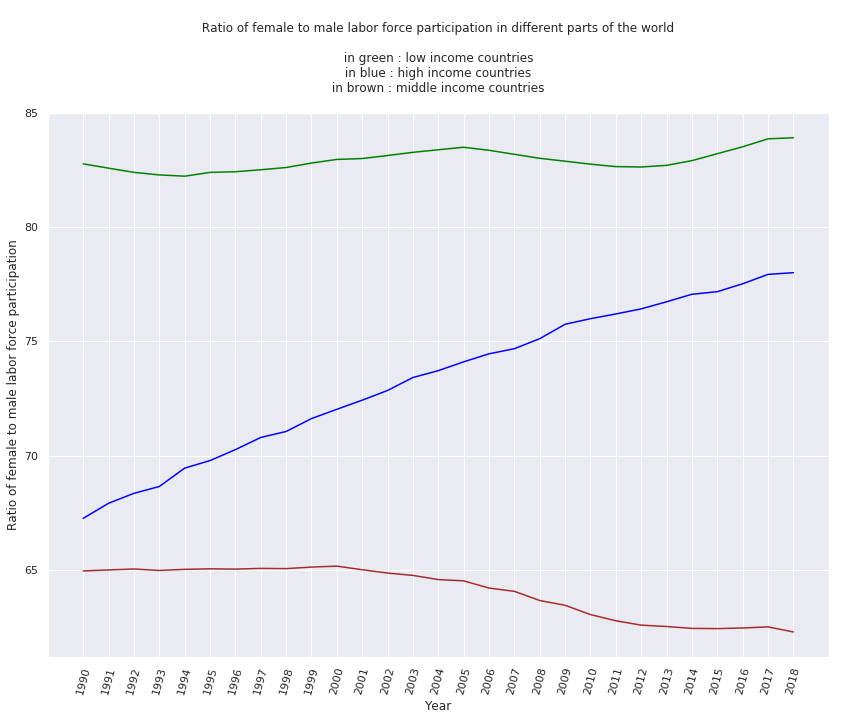

In [30]:
high_income.rename(columns = {'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation'},inplace=True)
middle_income.rename(columns = {'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation'},inplace=True)
low_income.rename(columns = {'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation'},inplace=True)
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)

sns.lineplot(x='Year',y='Ratio of female to male labor force participation',data=high_income, color = 'blue')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Ratio of female to male labor force participation',data=middle_income, color = 'brown')

sns.lineplot(x='Year',y='Ratio of female to male labor force participation',data=low_income, color = 'green')
plt.title('\n Ratio of female to male labor force participation in different parts of the world \n\n green : low income countries \n blue : high income countries \n brown : middle income countries \n')
plt.show()

#plot.legend

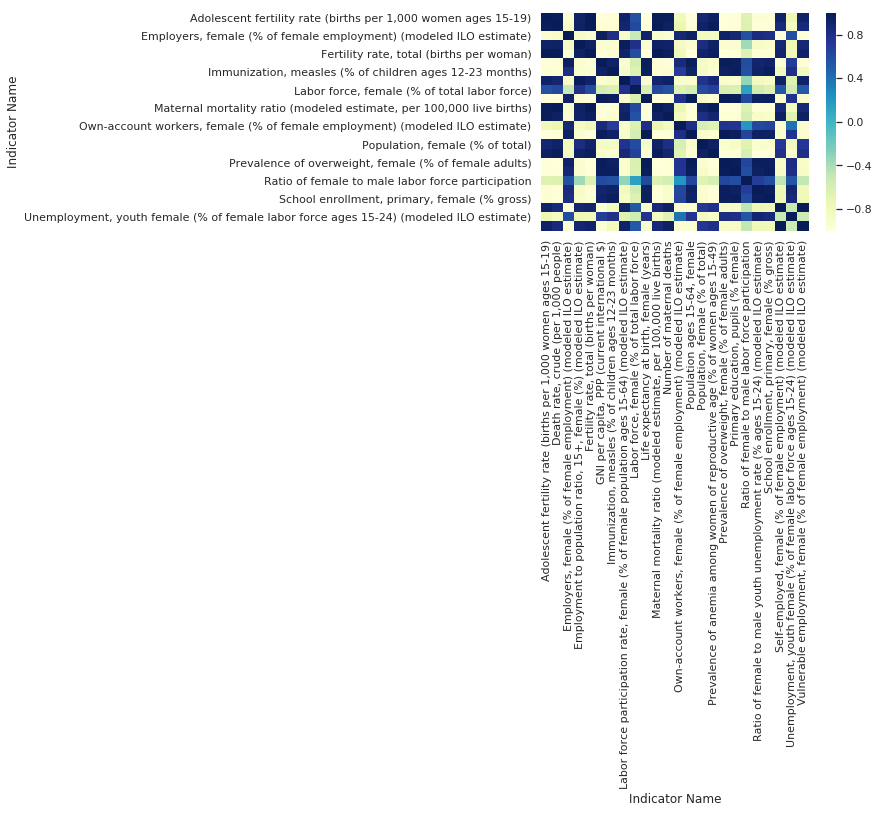

In [31]:
sns.heatmap((low_income.corr()), cmap='YlGnBu')

In [0]:
low_income.columns
low_income2 = low_income.filter(['Year','Employers, female (% of female employment) (modeled ILO estimate)',
  'Own-account workers, female (% of female employment) (modeled ILO estimate)',
  'Prevalence of overweight, female (% of female adults)',
  'Primary education, pupils (% female)',
  'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
  'School enrollment, primary, female (% gross)',
  'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
  'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)'],axis=1)

In [33]:
low_income2.corr()

Indicator Name,"Employers, female (% of female employment) (modeled ILO estimate)","Own-account workers, female (% of female employment) (modeled ILO estimate)","Prevalence of overweight, female (% of female adults)","Primary education, pupils (% female)","School enrollment, primary, female (% gross)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)"
Indicator Name,,,,,,
"Employers, female (% of female employment) (modeled ILO estimate)",1.000000,0.877958,0.922135,0.878441,0.811228,0.598282
"Own-account workers, female (% of female employment) (modeled ILO estimate)",0.877958,1.000000,0.771529,0.754588,0.651820,0.406125
"Prevalence of overweight, female (% of female adults)",0.922135,0.771529,1.000000,0.980889,0.967935,0.821346
"Primary education, pupils (% female)",0.878441,0.754588,0.980889,1.000000,0.980930,0.799149
"School enrollment, primary, female (% gross)",0.811228,0.651820,0.967935,0.980930,1.000000,0.861866
"Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)",0.598282,0.406125,0.821346,0.799149,0.861866,1.000000


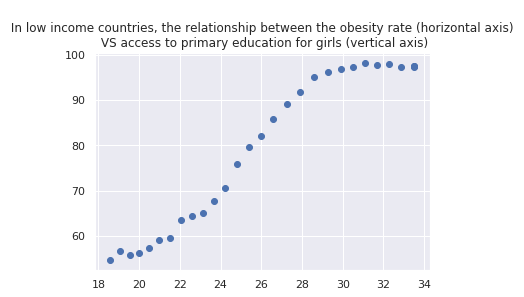

In [34]:
plt.scatter(x=low_income2['Prevalence of overweight, female (% of female adults)'], y=low_income2['School enrollment, primary, female (% gross)'])
plt.title('\n In low income countries, the relationship between the obesity rate (horizontal axis) \n VS access to primary education for girls (vertical axis)')
plt.show()

In [0]:
plt.scatter(x=low_income2['Prevalence of overweight, female (% of female adults)'], y=low_income2['Employers, female (% of female employment) (modeled ILO estimate)'])
plt.title('\n In low income countries, the relationship between the obesity rate (horizontal axis) \n VS the share of women-entrepreneurs among the female labor force (vertical axis)')

plt. show()

In [0]:
latam = df1[df1.Region=='Latin America & Caribbean (excluding high income)']

In [0]:
latam = setting_frame(latam)
latam = latam.set_index('Year')


In [0]:
latam =latam.filter(['Employers, female (% of female employment) (modeled ILO estimate)',
'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',
'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
'Self-employed, female (% of female employment) (modeled ILO estimate)',
                     'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)'],axis=1)


In [0]:
latam.rename(columns={'Employers, female (% of female employment) (modeled ILO estimate)':'Share of female employers',
'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)':'Share of women in the total labor force',
'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation rate',
'Self-employed, female (% of female employment) (modeled ILO estimate)':'Female Freelancers',
                      'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)':'Share of women in the youth unemployment',
'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)':'Share of female among salaried workers'},inplace=True)

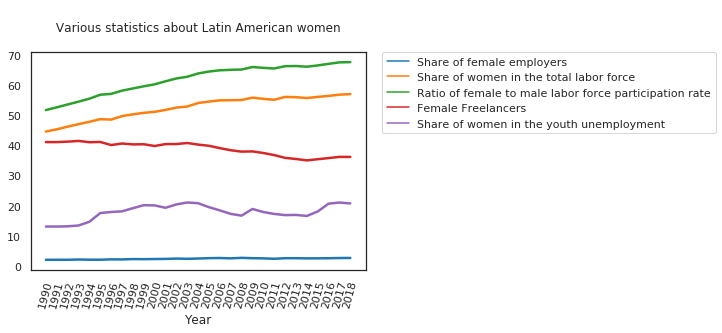

In [40]:
sns.set(style="white")
sns.lineplot(data=latam, dashes=False, palette="tab10", linewidth=2.5)
#fig = plt.figure(figsize = (14, 10)) 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('\n Various statistics about Latin American women \n')
plt.xticks(rotation = 75)
plt.show()

In [0]:
eu = df1[df1.Region=='European Union']
eu = setting_frame(eu)
eu.index = pd.DatetimeIndex(eu.Year)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


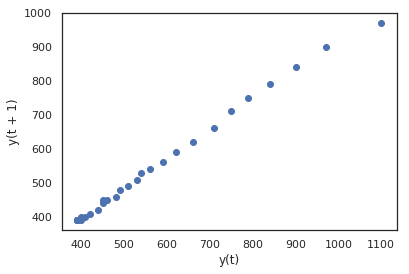

In [43]:
from pandas.plotting import lag_plot

lag_plot(eu['Number of maternal deaths'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


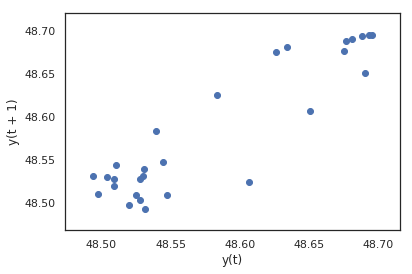

In [44]:
lag_plot(eu['Primary education, pupils (% female)'])

In [45]:
from statsmodels.tsa.ar_model import AR

train, test = eu['Number of maternal deaths'][:-15], eu['Number of maternal deaths'][-10:]
model = AR(eu['Number of maternal deaths'])
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [0]:
print(model_fit.params)

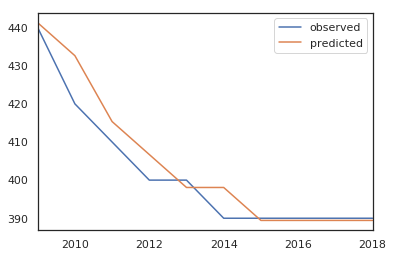

In [47]:
pred = pd.DataFrame({'observed':test, 'predicted':predictions})
pred.plot()

In [48]:
from statsmodels.tsa.stattools import adfuller

adfuller(eu['Number of maternal deaths'])[1]


4.59167342456152e-27

In [53]:
#moving average model
from statsmodels.tsa.arima_model import ARMA

model = ARMA(eu['Number of maternal deaths'], order=(0, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(eu['Number of maternal deaths'])-15, len(eu['Number of maternal deaths'])-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


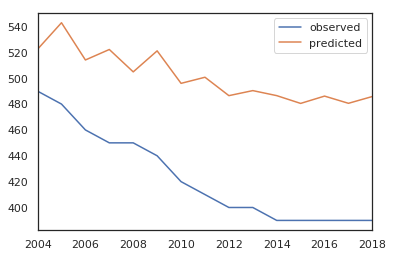

In [54]:
pred2 = pd.DataFrame({'observed':eu['Number of maternal deaths'][-15:], 'predicted':predictions})
pred2.plot()
plt.show()

In [0]:
model = ARMA(eu['Number of maternal deaths'], order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(eu['Number of maternal deaths'])-15, len(eu['Number of maternal deaths'])-1)

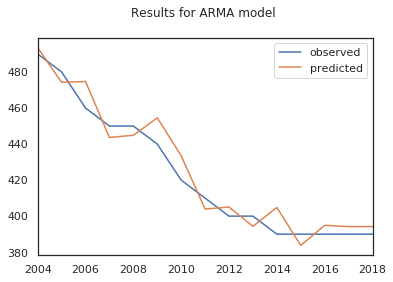

In [58]:
pred2 = pd.DataFrame({'observed':eu['Number of maternal deaths'][-15:], 'predicted':predictions})
pred2.plot()
plt.title('Results for ARMA model \n')
plt.show()

In [59]:
model = ARMA(eu['Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)'], order=(9, 0))
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(eu['Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)'])-15, len(eu['Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)'])-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
obs = pd.DataFrame({'observed':eu['Prevalence of overweight, female (% of female adults)'][-15:], 'predicted':predictions})
obs.plot()
plt.title('Results for an ARMA model with different parameters \n')

plt.show()

In [0]:
eu.columns

In [0]:
eu.rename(columns = {'Death rate, crude (per 1,000 people)':'Death_rate_1000',
                    'Fertility rate, total (births per woman)':'Fertility_rate',
                    'GNI per capita, PPP (current international $)':'Zone_GNI',
                    'Prevalence of overweight, female (% of female adults)':'Obesity_rate',
                    'Prevalence of anemia among women of reproductive age (% of women ages 15-49)':'Anemia_prevalence_women',
                    'Number of maternal deaths':'Number_maternal_deaths',
                    'Immunization, measles (% of children ages 12-23 months)':'Baby_measle_immunization',
                    'Labor force, female (% of total labor force)':'Share_women_labor_force',
                    'Adolescent fertility rate (births per 1,000 women ages 15-19)':'Adolescent_pregnancy_rate_1000'},inplace=True)


In [41]:
eu2 = eu[['Baby_measle_immunization', 'Anemia_prevalence_women']].copy()
eu2.shape

(29, 2)

In [42]:
testset = eu2
target = eu['Share_women_labor_force']

from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import StandardScaler
#testset = StandardScaler().fit_transform(testset)
#testset = pd.DataFrame(testset)

#b = sm.add_constant(testset)
X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          3.979e+05
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    8.41e-49
Time:                             10:20:16   Log-Likelihood:                          1.4207
No. Observations:                       23   AIC:                                      1.159
Df Residuals:                           21   BIC:                                      3.430
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
                               coef    std err          t      P>|t|  

In [43]:
from sklearn.metrics import r2_score
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.9243026443985223

In [47]:
eu3 = eu[['Adolescent_pregnancy_rate_1000','Death_rate_1000','Zone_GNI', 'Anemia_prevalence_women']].copy()

testset = eu3
target = eu['Share_women_labor_force']

X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          6.921e+04
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    2.94e-39
Time:                             10:24:34   Log-Likelihood:                         -9.4273
No. Observations:                       23   AIC:                                      26.85
Df Residuals:                           19   BIC:                                      31.40
Df Model:                                4                                                  
Covariance Type:                 nonrobust                                                  
                                     coef    std err          t      P

In [48]:
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.63284344740665

In [0]:
ArabWorld = df1[df1['Region']=='Arab World']
ArabWorld = setting_frame(ArabWorld)

In [0]:
Pacific_Asia = df1[df1['Region']=='East Asia & Pacific']
Pacific_Asia = setting_frame(Pacific_Asia)

In [0]:
ArabWorld.rename(columns = {'Death rate, crude (per 1,000 people)':'Death_rate_1000',
                    'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)':'Share_women_labor_force',
                    'GNI per capita, PPP (current international $)':'Zone_GNI',
                    'Immunization, measles (% of children ages 12-23 months)':'Baby_measle_immunization',
                    'Prevalence of anemia among women of reproductive age (% of women ages 15-49)':'Anemia_prevalence_women',
                    'Number of maternal deaths':'Number_maternal_deaths',
                           'Primary education, pupils (% female)':'Primary_education',
                           'Life expectancy at birth, female (years)':'Life_expectancy',
                           'Fertility rate, total (births per woman)':'Fertility_rate'},inplace=True)

In [51]:
aw = ArabWorld[['Primary_education','Death_rate_1000','Zone_GNI']].copy()

testset = aw
target = ArabWorld['Share_women_labor_force']

X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          4.785e+04
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    1.02e-38
Time:                             10:33:22   Log-Likelihood:                        -0.57290
No. Observations:                       23   AIC:                                      7.146
Df Residuals:                           20   BIC:                                      10.55
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

In [52]:
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.8745260093996272

In [53]:
aw2 = ArabWorld[['Life_expectancy','Fertility_rate']].copy()

testset = aw2
target = ArabWorld['Share_women_labor_force']

X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          8.330e+04
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    1.14e-41
Time:                             10:36:56   Log-Likelihood:                         0.43942
No. Observations:                       23   AIC:                                      3.121
Df Residuals:                           21   BIC:                                      5.392
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
                      coef    std err          t      P>|t|      [0.02

In [54]:
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

-1.6067083768273855

In [0]:
ArabWorld.rename(columns={'Adolescent fertility rate (births per 1,000 women ages 15-19)':'Adolescent_fertility_rate'}, inplace=True)
Pacific_Asia.rename(columns={'Adolescent fertility rate (births per 1,000 women ages 15-19)':'Adolescent_fertility_rate'}, inplace=True)

In [0]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(testset, target)

selector.ranking_

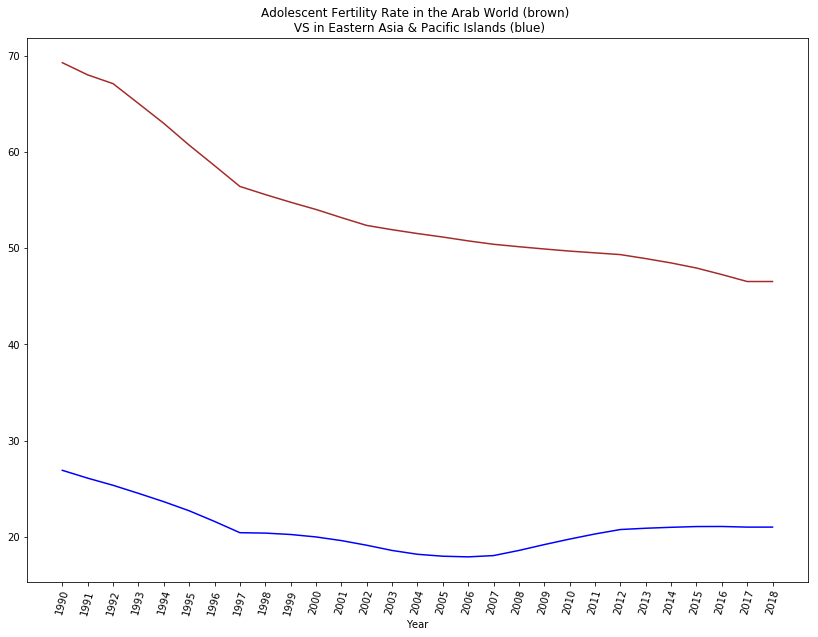

In [80]:
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)

sns.lineplot(x='Year',y='Adolescent_fertility_rate',data=ArabWorld, color = 'brown')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Adolescent_fertility_rate',data=Pacific_Asia, color = 'blue')
plt.title('Adolescent Fertility Rate in the Arab World (brown) \n VS in Eastern Asia & Pacific Islands (blue)')
plt.ylabel("")
plt.show()

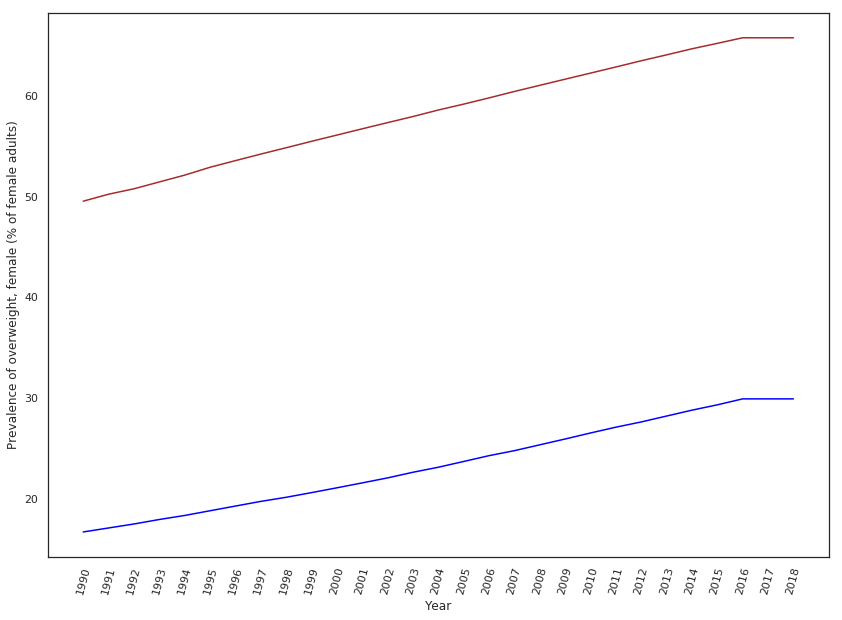

In [0]:
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)

sns.lineplot(x='Year',y='Prevalence of overweight, female (% of female adults)',data=ArabWorld, color = 'brown')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Prevalence of overweight, female (% of female adults)',data=Pacific_Asia, color = 'blue')


plt.show()

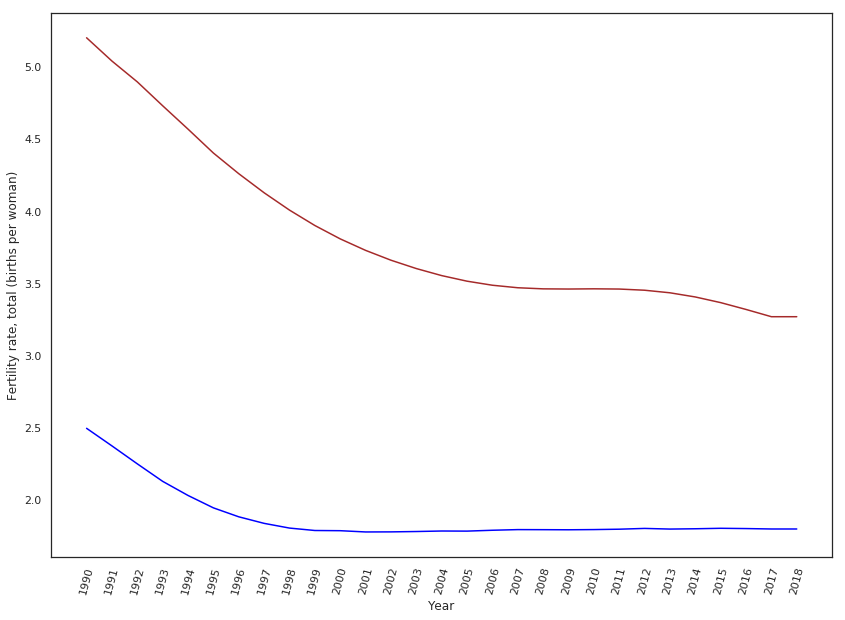

In [0]:

fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)

sns.lineplot(x='Year',y='Fertility rate, total (births per woman)',data=ArabWorld, color = 'brown')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Fertility rate, total (births per woman)',data=Pacific_Asia, color = 'blue')


plt.show()

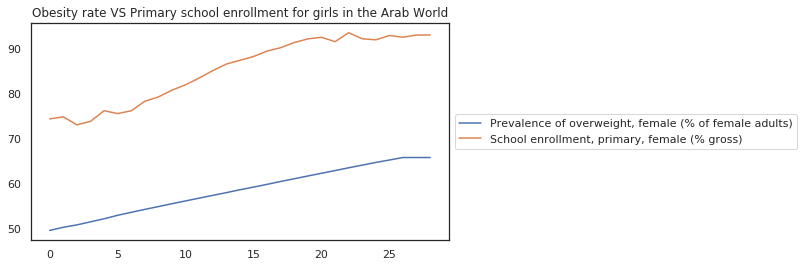

In [0]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)

ax.plot(ArabWorld['Prevalence of overweight, female (% of female adults)'])
ax.plot(ArabWorld['School enrollment, primary, female (% gross)'] )

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.25, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Obesity rate VS Primary school enrollment for girls in the Arab World')
plt.show()

In [0]:
adfuller(ArabWorld['School enrollment, primary, female (% gross)'])

(-2.950984624562408,
 0.03973233019195238,
 1,
 25,
 {'1%': -3.7238633119999998, '10%': -2.6328004, '5%': -2.98648896},
 35.24256027836384)

In [0]:
ArabWorld['diffS']=ArabWorld['School enrollment, primary, female (% gross)'].diff()
ArabWorld['diffM']=ArabWorld['Prevalence of overweight, female (% of female adults)'].diff()
model2=sm.OLS(endog=ArabWorld['diffS'].dropna(),exog=ArabWorld[['diffM','const']].dropna())
results2=model1.fit()
print(results2.summary())

                                                  OLS Regression Results                                                  
Dep. Variable:     Prevalence of overweight, female (% of female adults)   R-squared (uncentered):                   1.000
Model:                                                               OLS   Adj. R-squared (uncentered):              1.000
Method:                                                    Least Squares   F-statistic:                          6.226e+04
Date:                                                   Tue, 16 Jul 2019   Prob (F-statistic):                    2.06e-48
Time:                                                           17:10:27   Log-Likelihood:                         -47.455
No. Observations:                                                     29   AIC:                                      96.91
Df Residuals:                                                         28   BIC:                                      98.28
Df Model:       

In [0]:
India = pd.read_csv('Gender_StatsData.csv')

In [0]:
India = India[India['Country Name'] == 'India']

India['full_count'] = India.apply(lambda x: x.count(), axis=1)
India = India.drop(['Country Code','Indicator Code','Unnamed: 63'],axis=1)

In [0]:
India = India[India['full_count']>=60]

In [0]:
India['1961'].fillna(India['1962'], inplace=True)
India['1960'].fillna(India['1961'], inplace=True)
India['2018'].fillna(India['2017'], inplace=True)
India.rename(columns = {'Country Name':'Region'},inplace=True)

India = setting_frame(India)


In [0]:
testset = India.drop(['Fertility rate, total (births per woman)','Year'],axis=1)
target = India['Fertility rate, total (births per woman)']

In [0]:
testset = testset.drop(['Age population, age 0, female, interpolated',
       'Age population, age 0, male, interpolated',
       'Age population, age 01, female, interpolated',
       'Age population, age 01, male, interpolated',
       'Age population, age 02, female, interpolated',
       'Age population, age 02, male, interpolated',
       'Age population, age 03, female, interpolated',
       'Age population, age 03, male, interpolated',
       'Age population, age 04, female, interpolated','Population ages 15-64, female',
       'Age population, age 04, male, interpolated',
       'Age population, age 05, female, interpolated','Population ages 0-14, female',
                        'GDP (current US$)','Population ages 15-64, male',
       'Age population, age 05, male, interpolated','Population, total'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
testset = StandardScaler().fit_transform(testset)
testset = pd.DataFrame(testset)

#b = sm.add_constant(testset)
X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) # random_state=45)
 # en 1er la cible à prédire, en 2nd le train set
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Fertility rate, total (births per woman)   R-squared (uncentered):                   0.795
Model:                                                  OLS   Adj. R-squared (uncentered):              0.671
Method:                                       Least Squares   F-statistic:                              6.446
Date:                                      Thu, 18 Jul 2019   Prob (F-statistic):                    4.37e-06
Time:                                              15:20:50   Log-Likelihood:                         -140.29
No. Observations:                                        48   AIC:                                      316.6
Df Residuals:                                            30   BIC:                                      350.3
Df Model:                                                18                                                  
Covariance

In [11]:


from sklearn.metrics import r2_score
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

-0.34505673333978204

In [0]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = SVR(kernel="linear")
selector = RFE(estimator, 5, step=1)
selector = selector.fit(testset, target)

selector.ranking_